# Ploynomial Regression - Salary

In [14]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [3]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [4]:
df = df.drop('Position', axis=1)
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


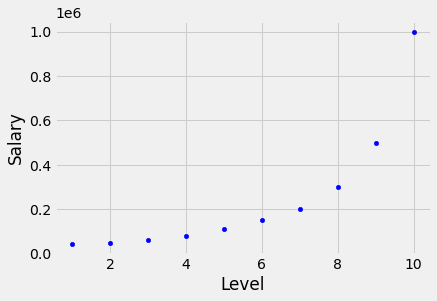

In [15]:
df.plot.scatter('Level', 'Salary', color='blue')
plt.show()

In [6]:
X_train = df.drop('Salary', axis=1)
y_train = df['Salary']

# Modelling

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
model.coef_, model.intercept_

(array([80878.78787879]), -195333.3333333332)

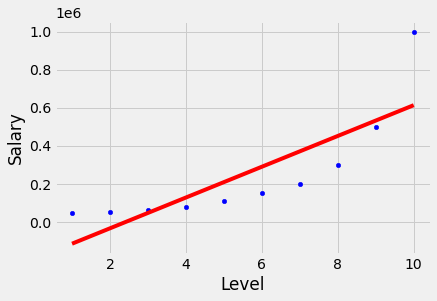

In [16]:
df.plot.scatter('Level', 'Salary', color='blue')
plt.plot(
    np.array(df['Level']),
    model.coef_[0] * np.array(df['Level']) + model.intercept_,
    color='red'
)
plt.show()

# Polynomial Regression

# Degree 2

In [10]:
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)
X_deg2 = quadratic.fit_transform(X_train)
X_deg2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [11]:
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y_train)

LinearRegression()

In [12]:
model_deg2.coef_, model_deg2.intercept_

(array([      0.        , -132871.21212121,   19431.81818182]),
 232166.6666666665)

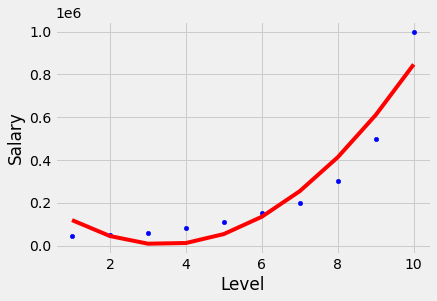

In [17]:
df.plot.scatter('Level', 'Salary', color='blue')
plt.plot(
    np.array(df['Level']),
    model_deg2.coef_[1] * np.array(df['Level']) 
        + model_deg2.coef_[2] * np.array(df['Level']) ** 2
        + model_deg2.intercept_,
    color='red'
)
plt.show()

# Degree 3

In [18]:
cubic = PolynomialFeatures(degree=3)
X_deg3 = cubic.fit_transform(X_train)
X_deg3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [19]:
model_deg3 = LinearRegression()
model_deg3.fit(X_deg3, y_train)

LinearRegression()

In [20]:
model_deg3.coef_, model_deg3.intercept_

(array([     0.        , 180664.33566432, -48548.95104895,   4120.04662005]),
 -121333.33333331218)

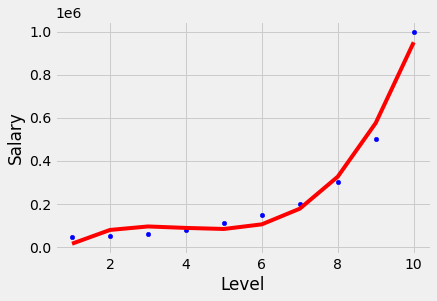

In [21]:
df.plot.scatter('Level', 'Salary', color='blue')
plt.plot(
    np.array(df['Level']),
    model_deg3.coef_[1] * np.array(df['Level']) 
        + model_deg3.coef_[2] * np.array(df['Level']) ** 2
        + model_deg3.coef_[3] * np.array(df['Level']) ** 3
        + model_deg3.intercept_,
    color='red'
)
plt.show()